Fold 1: AUROC: 0.8873, AUPRC: 0.9269
Fold 2: AUROC: 0.8154, AUPRC: 0.8247
Fold 3: AUROC: 0.8332, AUPRC: 0.8206
Fold 4: AUROC: 0.7860, AUPRC: 0.7484
Fold 5: AUROC: 0.8052, AUPRC: 0.8392
Fold 6: AUROC: 0.8021, AUPRC: 0.8339
Fold 7: AUROC: 0.8174, AUPRC: 0.8896
Fold 8: AUROC: 0.8027, AUPRC: 0.8331
Fold 9: AUROC: 0.9128, AUPRC: 0.8323
Fold 10: AUROC: 0.8158, AUPRC: 0.8308
Fold 11: AUROC: 0.8378, AUPRC: 0.8721
Fold 12: AUROC: 0.7929, AUPRC: 0.8070
Fold 13: AUROC: 0.8405, AUPRC: 0.5803
Fold 14: AUROC: 0.8447, AUPRC: 0.6491
Fold 15: AUROC: 0.8861, AUPRC: 0.8663
Fold 16: AUROC: 0.8683, AUPRC: 0.8808
Fold 17: AUROC: 0.8256, AUPRC: 0.8523
Fold 18: AUROC: 0.8541, AUPRC: 0.8202
Fold 19: AUROC: 0.8289, AUPRC: 0.8832
Fold 20: AUROC: 0.8461, AUPRC: 0.8604
Fold 21: AUROC: 0.9379, AUPRC: 0.9273
Fold 22: AUROC: 0.8925, AUPRC: 0.7977
Average AUROC: 0.8424
Average AUPRC: 0.8262
[2.11584125 1.13575799 0.12953943 0.8958155  0.20225898]


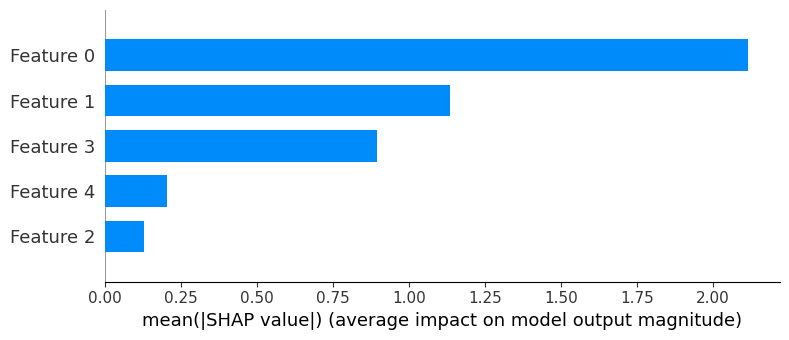

In [21]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import torch
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

lable_path = ' ' ###found in 1-label_marker
feature_path = ' ' ###found in 2-feature_marker
node_features = []
node_tags = []
for ch in range(1,23):
    lable = lable_path + '/chr' +str(ch)+'_label.txt'
    feature = feature_path + '/chr' +str(ch) + '_feature.txt'
    l = pd.read_csv(lable,sep = '\t',header = None).values
    f = pd.read_csv(feature,sep = ' ',header = None)
    f.loc[:,11] = np.log10(f.loc[:,11]+1)
    node_features.append(f.values)
    node_tags.append(l.flatten())


import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


auroc_scores = []
auprc_scores = []


for i in range(22):
    
    X_test = np.array(node_features[i])[:,:]
    y_test = np.array(node_tags[i].reshape(-1))

    
    X_train = np.vstack([node_features[j][:,:] for j in range(22) if j != i])
    y_train = np.concatenate([node_tags[j].reshape(-1) for j in range(22) if j != i])

    
    model = HistGradientBoostingClassifier()
    

    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    auroc = roc_auc_score(y_test, y_pred_proba)
    auprc = average_precision_score(y_test, y_pred_proba)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)

    print(f"Fold {i+1}: AUROC: {auroc:.4f}, AUPRC: {auprc:.4f}")


print(f"Average AUROC: {np.mean(auroc_scores):.4f}")
print(f"Average AUPRC: {np.mean(auprc_scores):.4f}")

import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)


feature_importance = np.abs(shap_values).mean(axis=0)
print(feature_importance)


shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)



In [4]:
X_test.shape

(24926, 8)